In [1]:
# ipython
%matplotlib inline

from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})
sns.set_style("white")
import glob
import json
import os
import sys
import json
import shutil
import os
import sys
import multiprocessing
import shutil
pool = multiprocessing.Pool(multiprocessing.cpu_count())

from PIL import Image


In [2]:
def extract_resolution(x):
    im = Image.open(x)
    width, height = im.size
    return {
        "dataset": os.path.basename(os.path.dirname(os.path.dirname(x))),
        "image": x,
        "width": width, 
        "height": height
    }

df = pd.DataFrame(list(map(extract_resolution, glob.glob("*/images/*"))))

d(df.head())


,dataset,image,width,height
0,pixabay_first50k,pixabay_first50k/images/still-life-art-and-lit...,1280,853
1,pixabay_first50k,pixabay_first50k/images/textures-3668419.jpg,1280,897
2,pixabay_first50k,pixabay_first50k/images/goose-3190750.jpg,1280,894
3,pixabay_first50k,pixabay_first50k/images/swan-fight-4066486.jpg,1280,854
4,pixabay_first50k,pixabay_first50k/images/el-capitan-4933472.jpg,1280,960


In [3]:
db_order = sorted(set(df["dataset"].values))
print(db_order)

print(df["width"].min(), df["width"].max())
print(df["height"].min(), df["height"].max())


['500px_cc0', 'aadb', 'ava', 'koniq10k', 'own', 'pixabay_first50k']
267 5472
288 5616


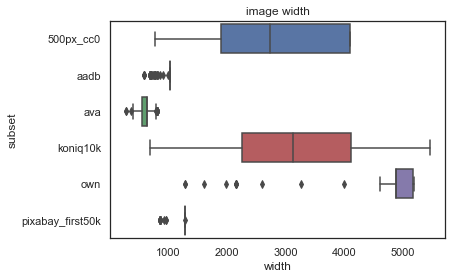

In [4]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")

ax = sns.boxplot(data=df, x="width", y="dataset", order=db_order)
ax.set_ylabel("subset")
ax.set_title("image width")
ax.get_figure().savefig("image_width.pdf", bbox_inches="tight")

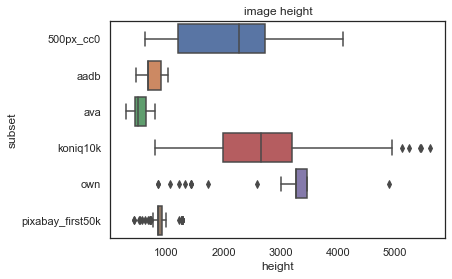

In [5]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")

ax = sns.boxplot(data=df, x="height", y="dataset", order=db_order)
ax.set_ylabel("subset")
ax.set_title("image height")

ax.get_figure().savefig("image_height.pdf", bbox_inches="tight")